In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mnist Dataset

In [108]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

# Preprocess dataset

In [109]:
x_train.shape

(60000, 28, 28)

In [110]:
y_train.shape

(60000,)

In [111]:
x_test.shape

(10000, 28, 28)

In [112]:
y_test.shape

(10000,)

In [113]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [114]:
y_train[0]

5

# Scaling the training data

In [115]:
x_train_scale = x_train/255
x_test_scale = x_test/255

In [116]:
x_train_scale[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Flatten the training data

In [117]:
x_train_flatten = x_train_scale.reshape(len(x_train) , 28*28)
x_test_flatten = x_test_scale.reshape(len(x_test) , 28*28)

In [118]:
x_train_flatten.shape

(60000, 784)

In [119]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Checking the image correctly showed

Image # 1


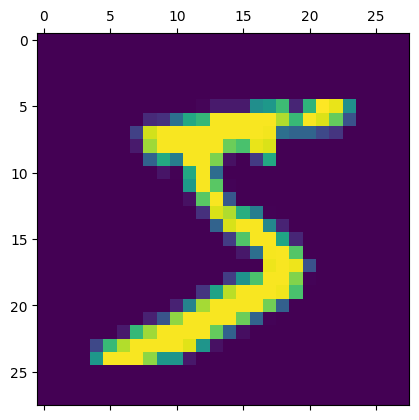

Image # 2


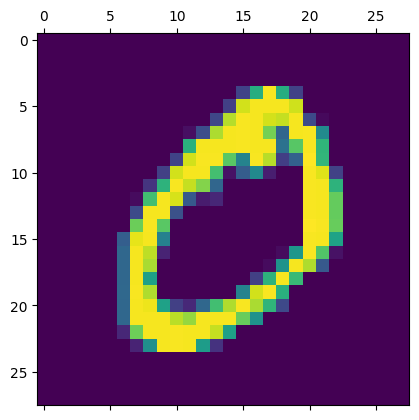

Image # 3


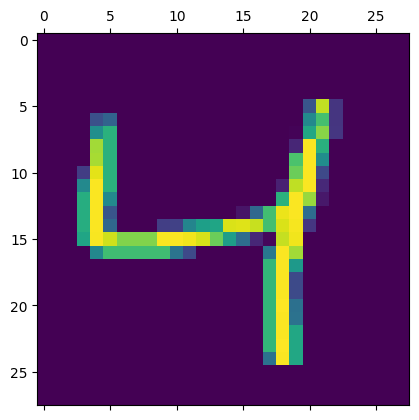

Image # 4


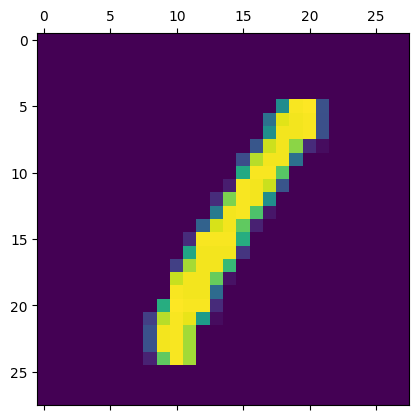

Image # 5


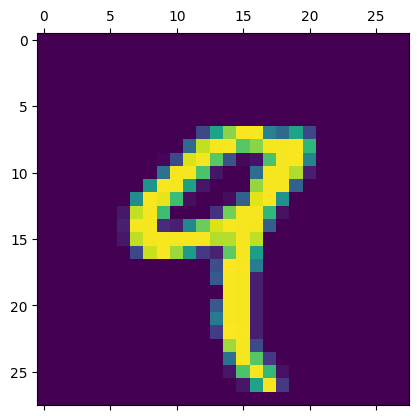

In [120]:
n = 5
for i in range(n):
    print(f"Image # {i+1}")
    plt.matshow(x_train[i])
    plt.show()

# Processing the target variable ... but not working

In [121]:
# classes = 10

# y_train = keras.utils.to_categorical(y_train,classes)
# y_test = keras.utils.to_categorical(y_test,classes)

In [122]:
# y_train.shape

# Building the model means setting hyper-parameters

In [123]:
model = keras.Sequential([
    keras.layers.Dense(1000 , input_shape=(784,) , activation='relu'),
    keras.layers.Dense(500 , activation='relu'),
    keras.layers.Dense(250 , activation='relu'),
    keras.layers.Dense(70 , activation='relu'),
    keras.layers.Dense(20 , activation='relu'),
    keras.layers.Dense(10 , activation='sigmoid')   #sigmoid is used for binary-classification and softmax is used for multiclass-classificatoin
])
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
    optimizer='adam'
)

# Traning the model

In [124]:
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 80s 41ms/step - loss: 0.2309 - accuracy: 0.9310
Epoch 2/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0998 - accuracy: 0.9717
Epoch 3/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0723 - accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0574 - accuracy: 0.9838
Epoch 5/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0486 - accuracy: 0.9859


In [125]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1000)              785000    
                                                                 
 dense_22 (Dense)            (None, 500)               500500    
                                                                 
 dense_23 (Dense)            (None, 250)               125250    
                                                                 
 dense_24 (Dense)            (None, 70)                17570     
                                                                 
 dense_25 (Dense)            (None, 20)                1420      
                                                                 
 dense_26 (Dense)            (None, 10)                210       
                                                                 
Total params: 1429950 (5.45 MB)
Trainable params: 1429

# accuracy

In [126]:
model.evaluate(x_test_flatten , y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0825 - accuracy: 0.9797


[0.08251006156206131, 0.9797000288963318]

# Heatmap

In [127]:
y_predicted = model.predict(x_test_flatten)

313/313 [==============================] - 3s 8ms/step


In [128]:
y_predicted[0]

array([1.1448397e-02, 9.8370337e-01, 9.4951975e-01, 9.8762929e-01,
       9.5324689e-01, 2.1336469e-04, 7.8781131e-06, 9.9999994e-01,
       9.7401989e-01, 9.9967587e-01], dtype=float32)

In [130]:
import numpy as np

np.argmax(y_predicted[0])

7

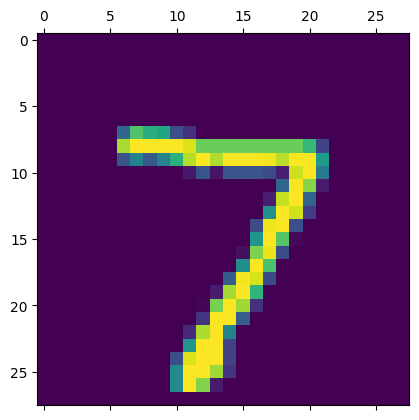

In [132]:
plt.matshow(x_test[0])

In [133]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [134]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Create confusion matrix for plotting heatmap

In [135]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    0,    0,    0,    2,    1,    4,    0],
       [   0, 1128,    4,    0,    0,    0,    0,    0,    3,    0],
       [   1,    0, 1024,    4,    0,    0,    0,    2,    1,    0],
       [   0,    0,    2,  998,    0,    1,    0,    2,    4,    3],
       [   0,    2,   11,    0,  962,    0,    2,    4,    0,    1],
       [   3,    0,    0,   15,    1,  850,   10,    0,   10,    3],
       [   6,    3,    1,    1,    2,    1,  942,    0,    2,    0],
       [   1,    3,   21,    2,    0,    0,    0,  992,    3,    6],
       [   0,    1,    8,    2,    0,    0,    0,    1,  962,    0],
       [   1,    4,    0,    8,   19,    1,    2,    4,    3,  967]])>

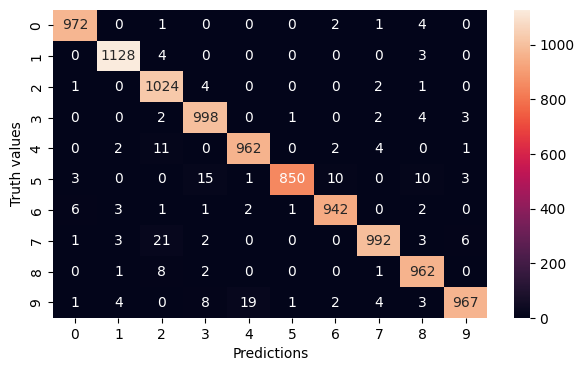

In [138]:
plt.figure(figsize=(7,4))
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth values")
plt.show()